In [14]:
!pip install imutils

In [15]:
!pip install opencv-python

In [16]:
!pip install seaborn

In [1]:
def sd(c):
# initialize the shape name and approximate the contour
    shape = "unidentified"
    peri = cv2.arcLength(c, True)
    #approx = cv2.approxPolyDP(c, 0.04 * peri, True)
    approx = cv2.approxPolyDP(c, 0.025 * peri, True)
    #print(approx)
    # if the shape is a triangle, it will have 3 vertices
    
    if len(approx) == 3:
        shape = "triangle"
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
    elif len(approx) == 5:
            shape = "pentagon"
    elif len(approx) == 6:
            shape = "hexagon"
    elif len(approx) == 7:
            shape = "heptagon" 
    elif len(approx) == 8:
            shape = "octagon"
    elif len(approx) == 9:
            shape = "nonagon"
    elif len(approx) == 10:
            shape = "decagon"
    elif len(approx) == 11:
            shape = "hendecagon"
    elif len(approx) == 12:
            shape = "dodecagon"
    elif len(approx) == 13:
            shape = "triskaidecagon"
    elif len(approx) == 14:
            shape = "tetrakaidecagon"
    elif len(approx) == 15:
            shape = "pentadecagon"
    elif len(approx) == 16:
            shape = "hexakaidecagon"
    elif len(approx) == 17:
            shape = "heptadecagon"
    elif len(approx) == 18:
            shape = "octakaidecagon"
    elif len(approx) == 19:
            shape = "enneadecagon"
    elif len(approx) == 20:
            shape = "icosagon"
    elif len(approx) == 30:
            shape = "triacontagon"
    elif len(approx) == 40:
            shape = "tetracontagon"
    elif len(approx) == 50:
            shape = "pentacontagon"
    elif len(approx) == 60:
            shape = "hexacontagon"
    elif len(approx) == 70:
            shape = "heptacontagon"
    elif len(approx) == 80:
            shape = "octacontagon"
    elif len(approx) == 90:
            shape = "enneacontagon"
    elif len(approx) == 100:
            shape = "hectagon"
    else:
            shape = "circle"

    return shape

In [2]:
def rect_contains(r1, r2):
    return r1[0] < r2[0] < r2[2] < r1[2] and r1[1] < r2[1] < r2[3] < r1[3]

In [3]:
def get_contour_shapes(contours):
    c_s = dict()

    # Compute the center of the contour, then detect the name of the
    # hape using only the contour
    for c in contours:
        M = cv2.moments(c)
        
        if M["m00"] == 0: 
            cX = 0
            cY = 0
        else: 
            cX = int((M["m10"] / M["m00"]) * ratio)
            cY = int((M["m01"] / M["m00"]) * ratio)
        
        shape = sd(c)
        
        if shape in c_s.keys():
            old_count = c_s[shape]
            c_s[shape] = old_count + 1
        else:
            c_s[shape] = 1

    return c_s

In [4]:
def get_contours_within_region(contours, regions):
    regions_with_largest_contour = dict()
    
    for c in contours:
        
        shape = sd(c)
        
        c = c.astype("float")
        c *= ratio
        c = c.astype("int")

        area = cv2.contourArea(c)
        x,y,w,h = cv2.boundingRect(c)

        for row in regions.itertuples():
            start_point = int(im_width * row.left), int(im_height * row.top)
            end_point = start_point[0] + int(im_width * row.width), start_point[1] + int(im_height * row.height)

            opencv_rect = (x,y,x+w,y+h)
            custvis_rect = (int(im_width * row.left), int(im_height * row.top), start_point[0] + int(im_width * row.width), start_point[1] + int(im_height * row.height))

            if rect_contains(custvis_rect, opencv_rect):

                if custvis_rect in regions_with_largest_contour.keys():
                    prev_contour_area = regions_with_largest_contour[custvis_rect][1]
                    if area > prev_contour_area:
                        regions_with_largest_contour[custvis_rect] = [c, area, row.tag_name, (x,y+10), shape]
                    else:
                        continue
                else:
                    regions_with_largest_contour[custvis_rect] = [c, area, row.tag_name, (x,y+10), shape]
                    
    return regions_with_largest_contour

In [5]:
def get_contour_area(contours):
    c_a = dict()
    
    for c in contours:
        
        shape = sd(c)
        
        c = c.astype("float")
        c *= ratio
        c = c.astype("int")

        area = cv2.contourArea(c)
        
        if shape in c_a.keys():
            old_area = c_a[shape]
            c_a[shape] = old_area + area
        else:
            c_a[shape] = area
                    
    return c_a

In [1]:
from scipy.stats import kurtosis, skew
import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils

im_dir = '../../xxxxx/xxx/'

UNIQUE_FILES = list()

cv_regions = pd.read_csv('../../xxxx/tags/x.csv')

df = pd.read_csv('../../xxxx/xxx/xxx.csv')
df = df[['file_name', 'type_tag']]
df.columns = ['xxxx', 'xxx']
df['pigment_type'] = 'xxxx'

#
c_f = df[df["xxxx"].str.startswith("xxxx", na = False)]
c_f['xxxx'] = 'xxxxx'
#

al = pd.concat([c_f, c_c, s_f, s_c])
al['xxxx'].value_counts()

FileNotFoundError: [Errno 2] File ../../xxxx/tags/x.csv does not exist: '../../xxxx/tags/x.csv'

In [2]:
# Keep track of all classes and create map for encoding
class_map = dict()
tag_shape = dict()
area_shape = dict()
distinct_classes = sorted(set(al['xxxx'].values.tolist()))
i = 0
for class_name in distinct_classes:
    class_map[class_name] = i
    tag_shape[class_name] = dict()
    area_shape[class_name] = dict()
    i += 1
class_map

NameError: name 'al' is not defined

# Use ALL contour metrics

In [3]:
SHAPES = ['triangle', 'square', 'rectangle', 'pentagon', 'hexagon', 'heptagon', 'octagon', 'nonagon', 
          'decagon', 'hendecagon', 'dodecagon', 'triskaidecagon', 'tetrakaidecagon', "pentadecagon", 
          "hexakaidecagon", 'circle']
SHAPES_col = ['{}_cnt'.format(SHP) for SHP in SHAPES]
SHAPES_aa = ['{}_avg_ar'.format(SHP) for SHP in SHAPES]
SHAPES_ta = ['{}_tot_ar'.format(SHP) for SHP in SHAPES]

col_header = ["counter", "image_file", "mean_b", "mean_g", "mean_r", "std_b", "std_g", "std_r", "k1", 
              "s1", "number_of_objects_in_image", "target"] + SHAPES_col + SHAPES_ta + SHAPES_aa

col_features = ["mean_b", "mean_g", "mean_r", "std_b", "std_g", "std_r", "k1", "s1", 
                "number_of_objects_in_image"]  + SHAPES_col + SHAPES_ta + SHAPES_aa
records = list()
counter = 0
UNIQUE_FILES = list()

# Calculate features for each image
for row in al.itertuples():
    
    if row.image_filename in UNIQUE_FILES:
        continue
    
    tag_shape = dict()
    area_shape = dict()
    for class_name in distinct_classes:
        tag_shape[class_name] = dict()
        area_shape[class_name] = dict()
    
    image_file = im_dir + row.image_filename
    class_num = class_map[row.pigment_tag]
    
    raw_image = cv2.imread(image_file)
    im_width = raw_image.shape[0]
    im_height = raw_image.shape[1]
    
    #Calculate the RGB channel means and standard deviations for the image
    (mean_b, mean_g, mean_r), (std_b, std_g, std_r) = cv2.meanStdDev(raw_image)

    #Calculate the skew and kurtosis for the image
    gray_img1 = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
    k1 = kurtosis(gray_img1, axis=None)
    s1 = skew(gray_img1, axis=None)

    #Calculate the number of objects in the image
    gray= cv2.cvtColor(raw_image,cv2.COLOR_BGR2GRAY)
    edges= cv2.Canny(gray, 50,200)
    contours, hierarchy= cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    number_of_objects_in_image= len(contours)
    
    # Read Custom Vision regions from CSV
    this_img_regions = cv_regions[cv_regions['file_name'] == image_file.split('/')[-1]]
    print("Generating image feature vector for:\t{}".format(image_file.split('/')[-1]))
    print("Image class:\t{} ({})\n".format(row.pigment_tag, class_num))

    # load the image and resize it to a smaller factor so that
    # the shapes can be approximated better
    resized = imutils.resize(raw_image, width=300)
    ratio = raw_image.shape[0] / float(resized.shape[0])
    
    # Convert the resized image to grayscale and threshold it
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)[1]

    # Find contours in the thresholded image 
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(contours)

    # Determine shape of contour and determine if 
    # contour is completely contained within region
    contour_shapes = get_contour_shapes(cnts)
    contour_tot_area = get_contour_area(cnts)
    contour_avg_area = dict()
    
    for k in contour_tot_area.keys():
        contour_avg_area[k] = contour_tot_area[k] / contour_shapes[k]    
    
    TOTAL_SHAPE_COUNT = sum([contour_shapes[SHP] if SHP in contour_shapes else 0 for SHP in SHAPES])
    TOTAL_SHAPE_AREA = sum([contour_tot_area[SHP] if SHP in contour_tot_area else 0 for SHP in SHAPES])
    
    SHP_CNT = [contour_shapes[SHP]/TOTAL_SHAPE_COUNT if SHP in contour_shapes else 0 for SHP in SHAPES]
    SHP_TOT_AR = [contour_tot_area[SHP]/TOTAL_SHAPE_AREA if SHP in contour_tot_area else 0 for SHP in SHAPES]
    SHP_AVG_AR = [contour_avg_area[SHP] if SHP in contour_avg_area else 0 for SHP in SHAPES]

    records.append([counter, image_file, mean_b[0], mean_g[0], mean_r[0], std_b[0], std_g[0], std_r[0], k1, s1, number_of_objects_in_image, class_num] + SHP_CNT + SHP_TOT_AR + SHP_AVG_AR)
    counter +=1
    
    UNIQUE_FILES.append(row.image_filename)

df = pd.DataFrame(records, columns=col_header)

# Get the feature columns
X = df[col_features]

#Get the target
y = df["target"]

# we can then look at the top of the dataframe to see the sort of values it contains
X.describe(include = 'all')

NameError: name 'al' is not defined

# Use contour metrics for contours within Custom Vision region bounding box

In [4]:
SHAPES = ['triangle', 'square', 'rectangle', 'pentagon', 'hexagon', 'heptagon', 'octagon', 'nonagon', 
          'decagon', 'hendecagon', 'dodecagon', 'triskaidecagon', 'tetrakaidecagon', 'circle']
SHAPES_col = ['{}_cnt'.format(SHP) for SHP in SHAPES]
SHAPES_aa = ['{}_avg_ar'.format(SHP) for SHP in SHAPES]
SHAPES_ta = ['{}_tot_ar'.format(SHP) for SHP in SHAPES]

col_header = ["counter", "image_file", "mean_b", "mean_g", "mean_r", "std_b", "std_g", "std_r", "k1", 
              "s1", "number_of_objects_in_image", "target"] + SHAPES_col + SHAPES_ta + SHAPES_aa

col_features = ["mean_b", "mean_g", "mean_r", "std_b", "std_g", "std_r", "k1", "s1", 
                "number_of_objects_in_image"]  + SHAPES_col + SHAPES_ta + SHAPES_aa
records = list()
counter = 0

# Calculate features for each image
for row in al.itertuples():
    
    tag_shape = dict()
    area_shape = dict()
    for class_name in distinct_classes:
        tag_shape[class_name] = dict()
        area_shape[class_name] = dict()
    
    image_file = im_dir + row.image_filename
    class_num = class_map[row.pigment_tag]
    print(image_file, class_num)
    
    raw_image = cv2.imread(image_file)
    im_width = raw_image.shape[0]
    im_height = raw_image.shape[1]
    
    #Calculate the RGB channel means and standard deviations for the image
    (mean_b, mean_g, mean_r), (std_b, std_g, std_r) = cv2.meanStdDev(raw_image)

    #Calculate the skew and kurtosis for the image
    gray_img1 = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
    k1 = kurtosis(gray_img1, axis=None)
    s1 = skew(gray_img1, axis=None)

    #Calculate the number of objects in the image
    gray= cv2.cvtColor(raw_image,cv2.COLOR_BGR2GRAY)
    edges= cv2.Canny(gray, 50,200)
    contours, hierarchy= cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    number_of_objects_in_image= len(contours)
    
    # Read Custom Vision regions from CSV
    this_img_regions = cv_regions[cv_regions['file_name'] == image_file.split('/')[-1]]
    print(image_file.split('/')[-1])

    # load the image and resize it to a smaller factor so that
    # the shapes can be approximated better
    resized = imutils.resize(raw_image, width=300)
    ratio = raw_image.shape[0] / float(resized.shape[0])
    
    # Convert the resized image to grayscale and threshold it
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)[1]

    # Find contours in the thresholded image 
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(contours)

    # Determine shape of contour and determine if 
    # contour is completely contained within region
    contour_shapes = get_contour_shapes(cnts)
    cvbb = get_contours_within_region(cnts, this_img_regions)
    
    # Iterate through all contours within a region and track against bounding box tag
    for k in cvbb.keys():
        print(k)
        print('Custom Vision region: {}'.format(k))
        print('Largest contour within region: {}\n'.format(cvbb[k][1:]))
        shp = cvbb[k][4]
        tag = cvbb[k][2]
        ara = cvbb[k][1]

        cstviz_rect = k
        opencv_cont = cvbb[k][0]

        tag_dict = tag_shape[tag]

        if shp in tag_dict.keys():
            old_count = tag_dict[shp]
            tag_dict[shp] = old_count + 1
        else:
            tag_dict[shp] = 1

        shp_dict = area_shape[tag]

        if shp in shp_dict.keys():
            old_ara = shp_dict[shp]
            shp_dict[shp] = old_ara + ara
        else:
            shp_dict[shp] = ara
    
    SHP_CNT = [tag_shape[row.pigment_tag][SHP] if SHP in tag_shape[row.pigment_tag] else 0 for SHP in SHAPES]
    SHP_TOT_AR = [area_shape[row.pigment_tag][SHP] if SHP in area_shape[row.pigment_tag] else 0 for SHP in SHAPES]
    SHP_AVG_AR = [area_shape[row.pigment_tag][SHP]/tag_shape[row.pigment_tag][SHP] if SHP in area_shape[row.pigment_tag] else 0 for SHP in SHAPES]

    records.append([counter, image_file, mean_b[0], mean_g[0], mean_r[0], std_b[0], std_g[0], std_r[0], k1, s1, number_of_objects_in_image, class_num] + SHP_CNT + SHP_TOT_AR + SHP_AVG_AR)
    counter +=1

df = pd.DataFrame(records, columns=col_header)
df.head()

#Get the feature columns
X = df[col_features]

#Get the target
y = df["target"]

# we can then look at the top of the dataframe to see the sort of values it contains
X.describe(include = 'all')

NameError: name 'al' is not defined

In [25]:
df.to_csv('xxxx.csv')

In [5]:
full_dataset = X.copy()
full_dataset['target'] = y.copy()

full_dataset.to_csv('xxxxxx.csv')
#Note you need to manually divide this dataset into train.csv ,validation.csv and test.csv files and upload to AML as tabular  datasets

# let's take a look at the first few lines of the dataset
full_dataset.head()

NameError: name 'X' is not defined

In [6]:
# lets see how balanced the classes are (and if that matches to our expectation)
full_dataset['target'].value_counts()

NameError: name 'full_dataset' is not defined

In [28]:
import seaborn as sns
# let's evaluate visually how well our classes are differentiable on the pairplots
# can see two classes being present on a two variables charts?
# the pairplot function is an excellent way of seeing how variables inter-relate, but 30 feature can make studying each combination difficult!
sns.pairplot(full_dataset.loc[:, SHAPES_col + ['target']], hue = 'target')

# we can again use seaborn to easily create a visually interesting chart 
plt.figure(figsize = (15, 10))

# we can add the annot=True parameter to the sns.heatmap arguments if we want to show the correlation values 
sns.heatmap(full_dataset.loc[:, SHAPES_col + ['target']].corr(method='pearson'))

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fd6bd4fa598> (for post_execute):


KeyboardInterrupt: 

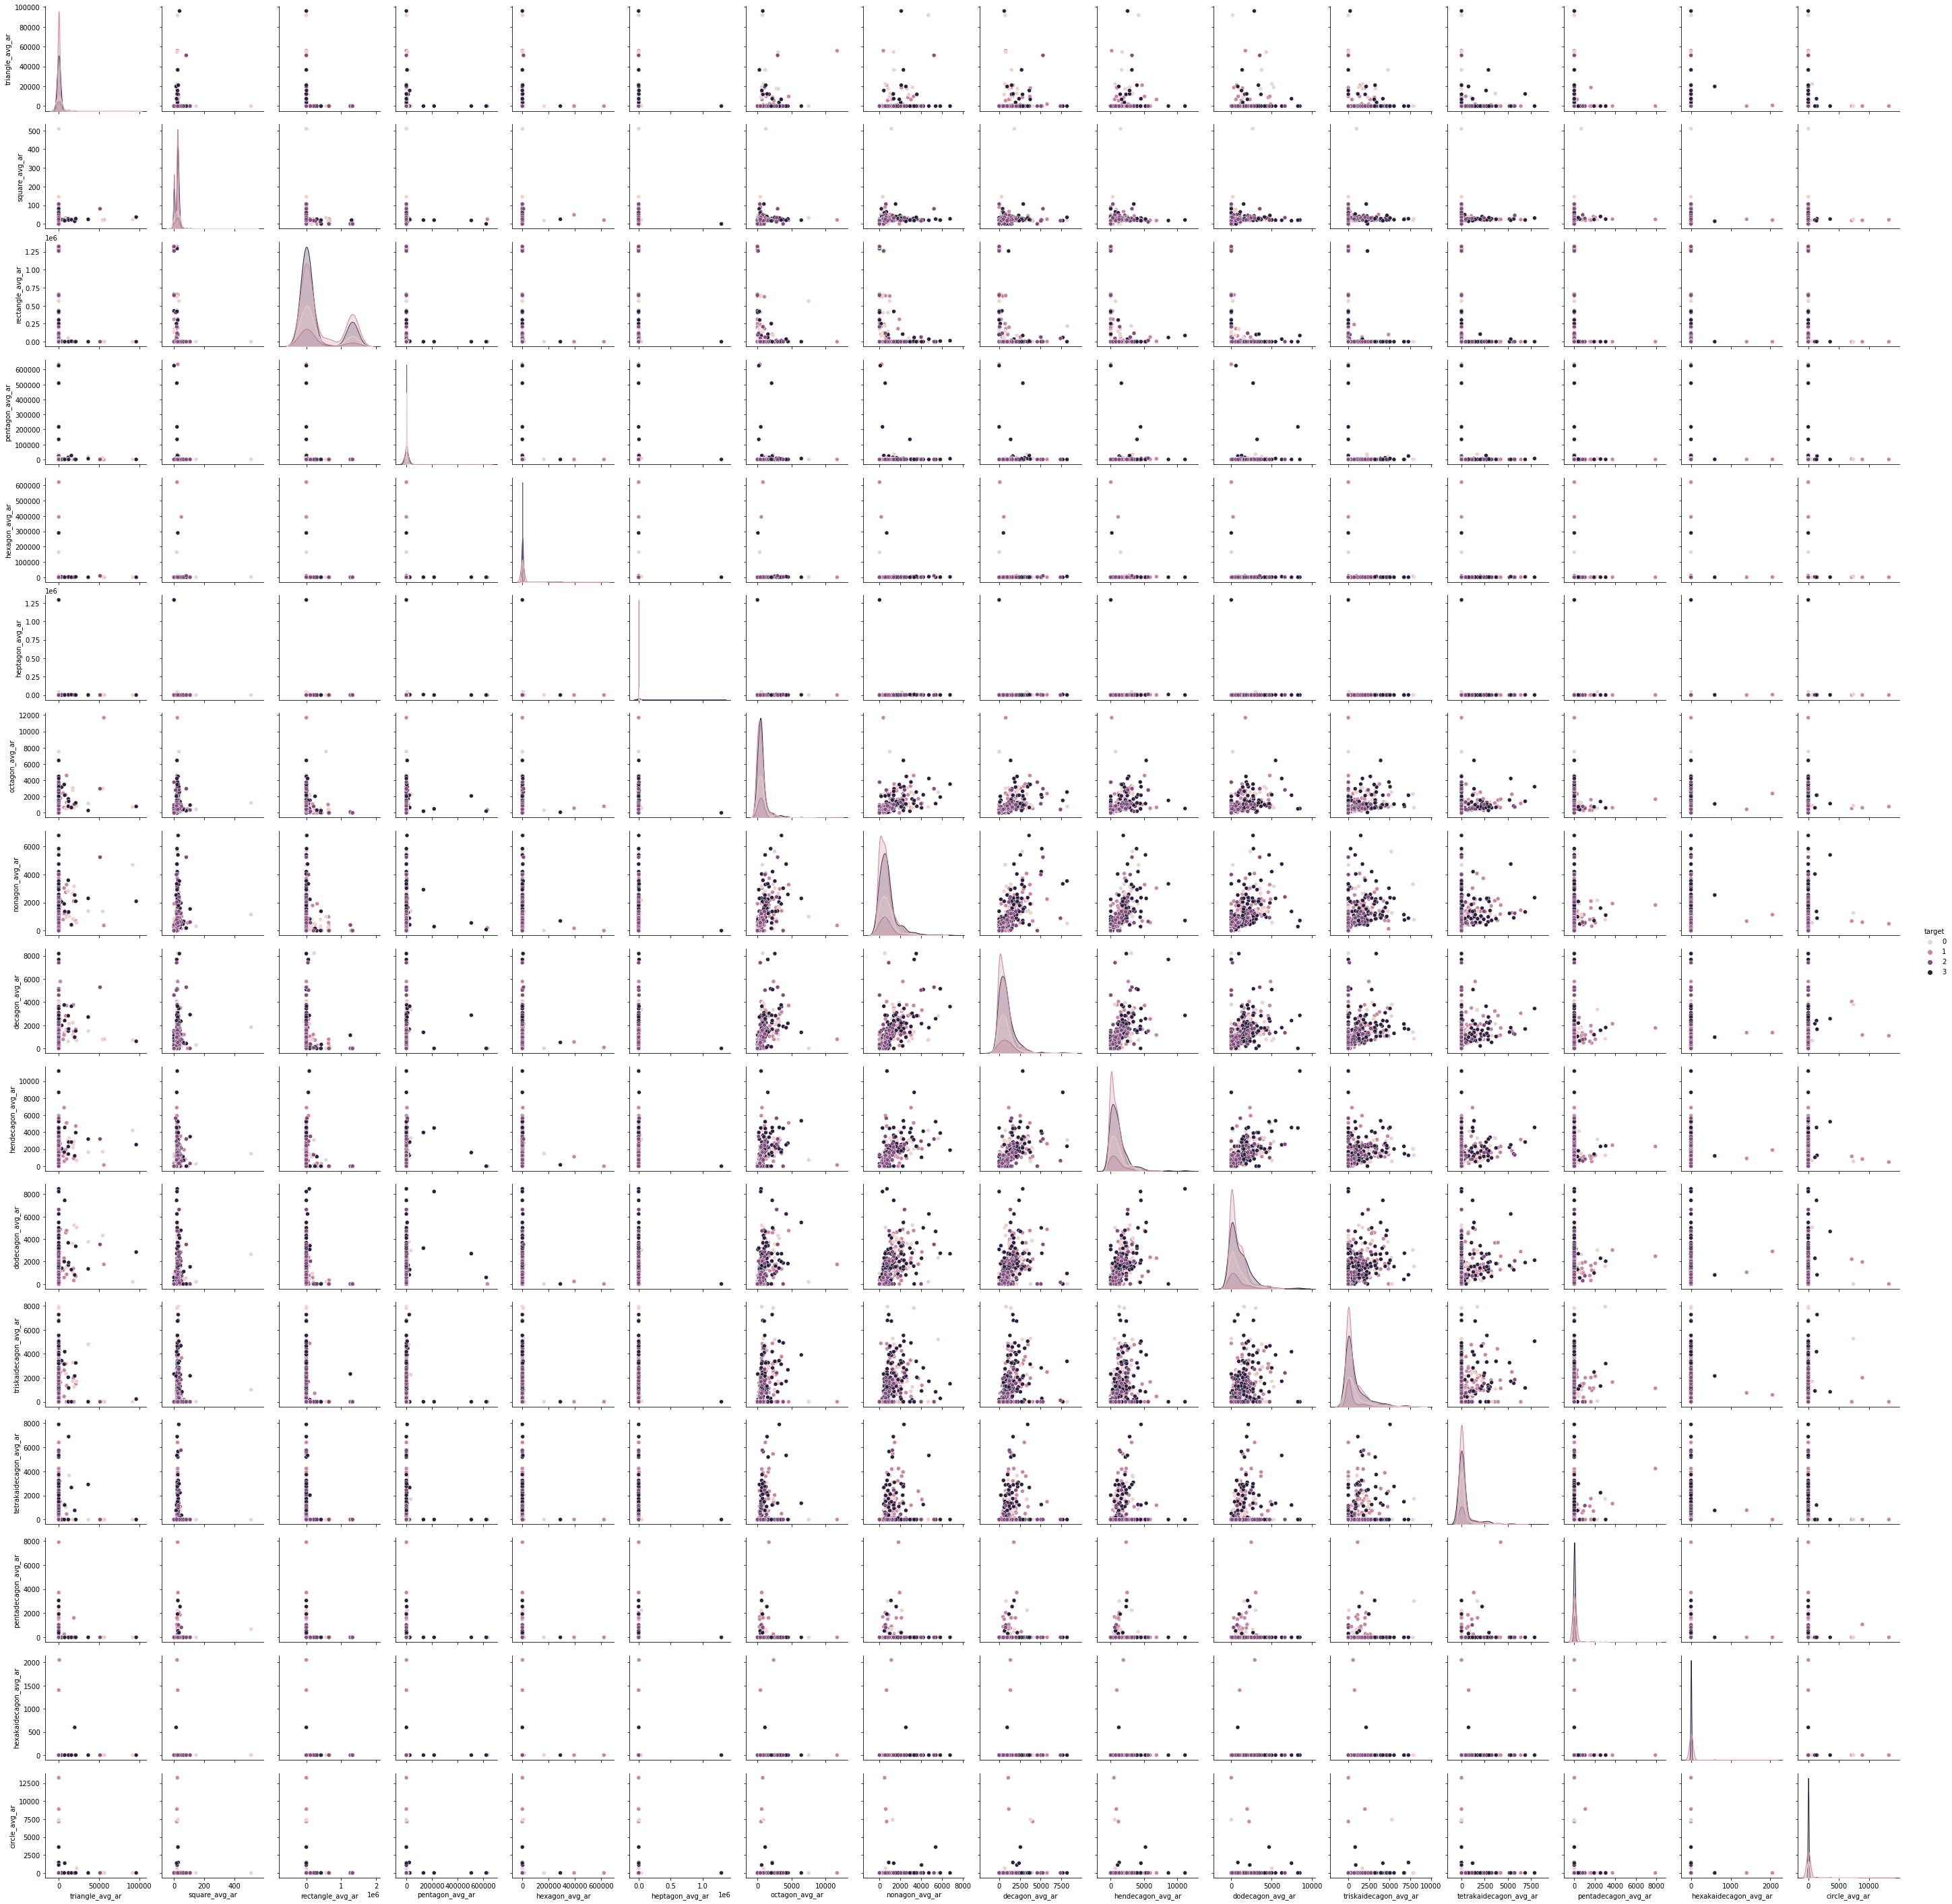

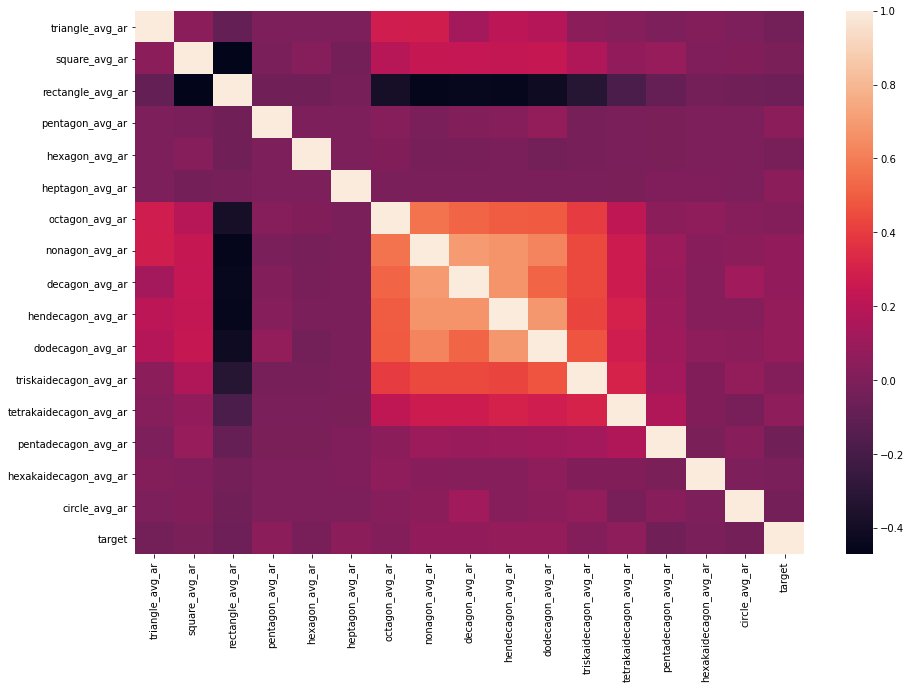

In [59]:
# let's evaluate visually how well our classes are differentiable on the pairplots
# can see two classes being present on a two variables charts?
# the pairplot function is an excellent way of seeing how variables inter-relate, but 30 feature can make studying each combination difficult!
sns.pairplot(full_dataset.loc[:, SHAPES_aa + ['target']], hue = 'target')

# we can again use seaborn to easily create a visually interesting chart 
plt.figure(figsize = (15, 10))

# we can add the annot=True parameter to the sns.heatmap arguments if we want to show the correlation values 
sns.heatmap(full_dataset.loc[:, SHAPES_aa + ['target']].corr(method='pearson'))

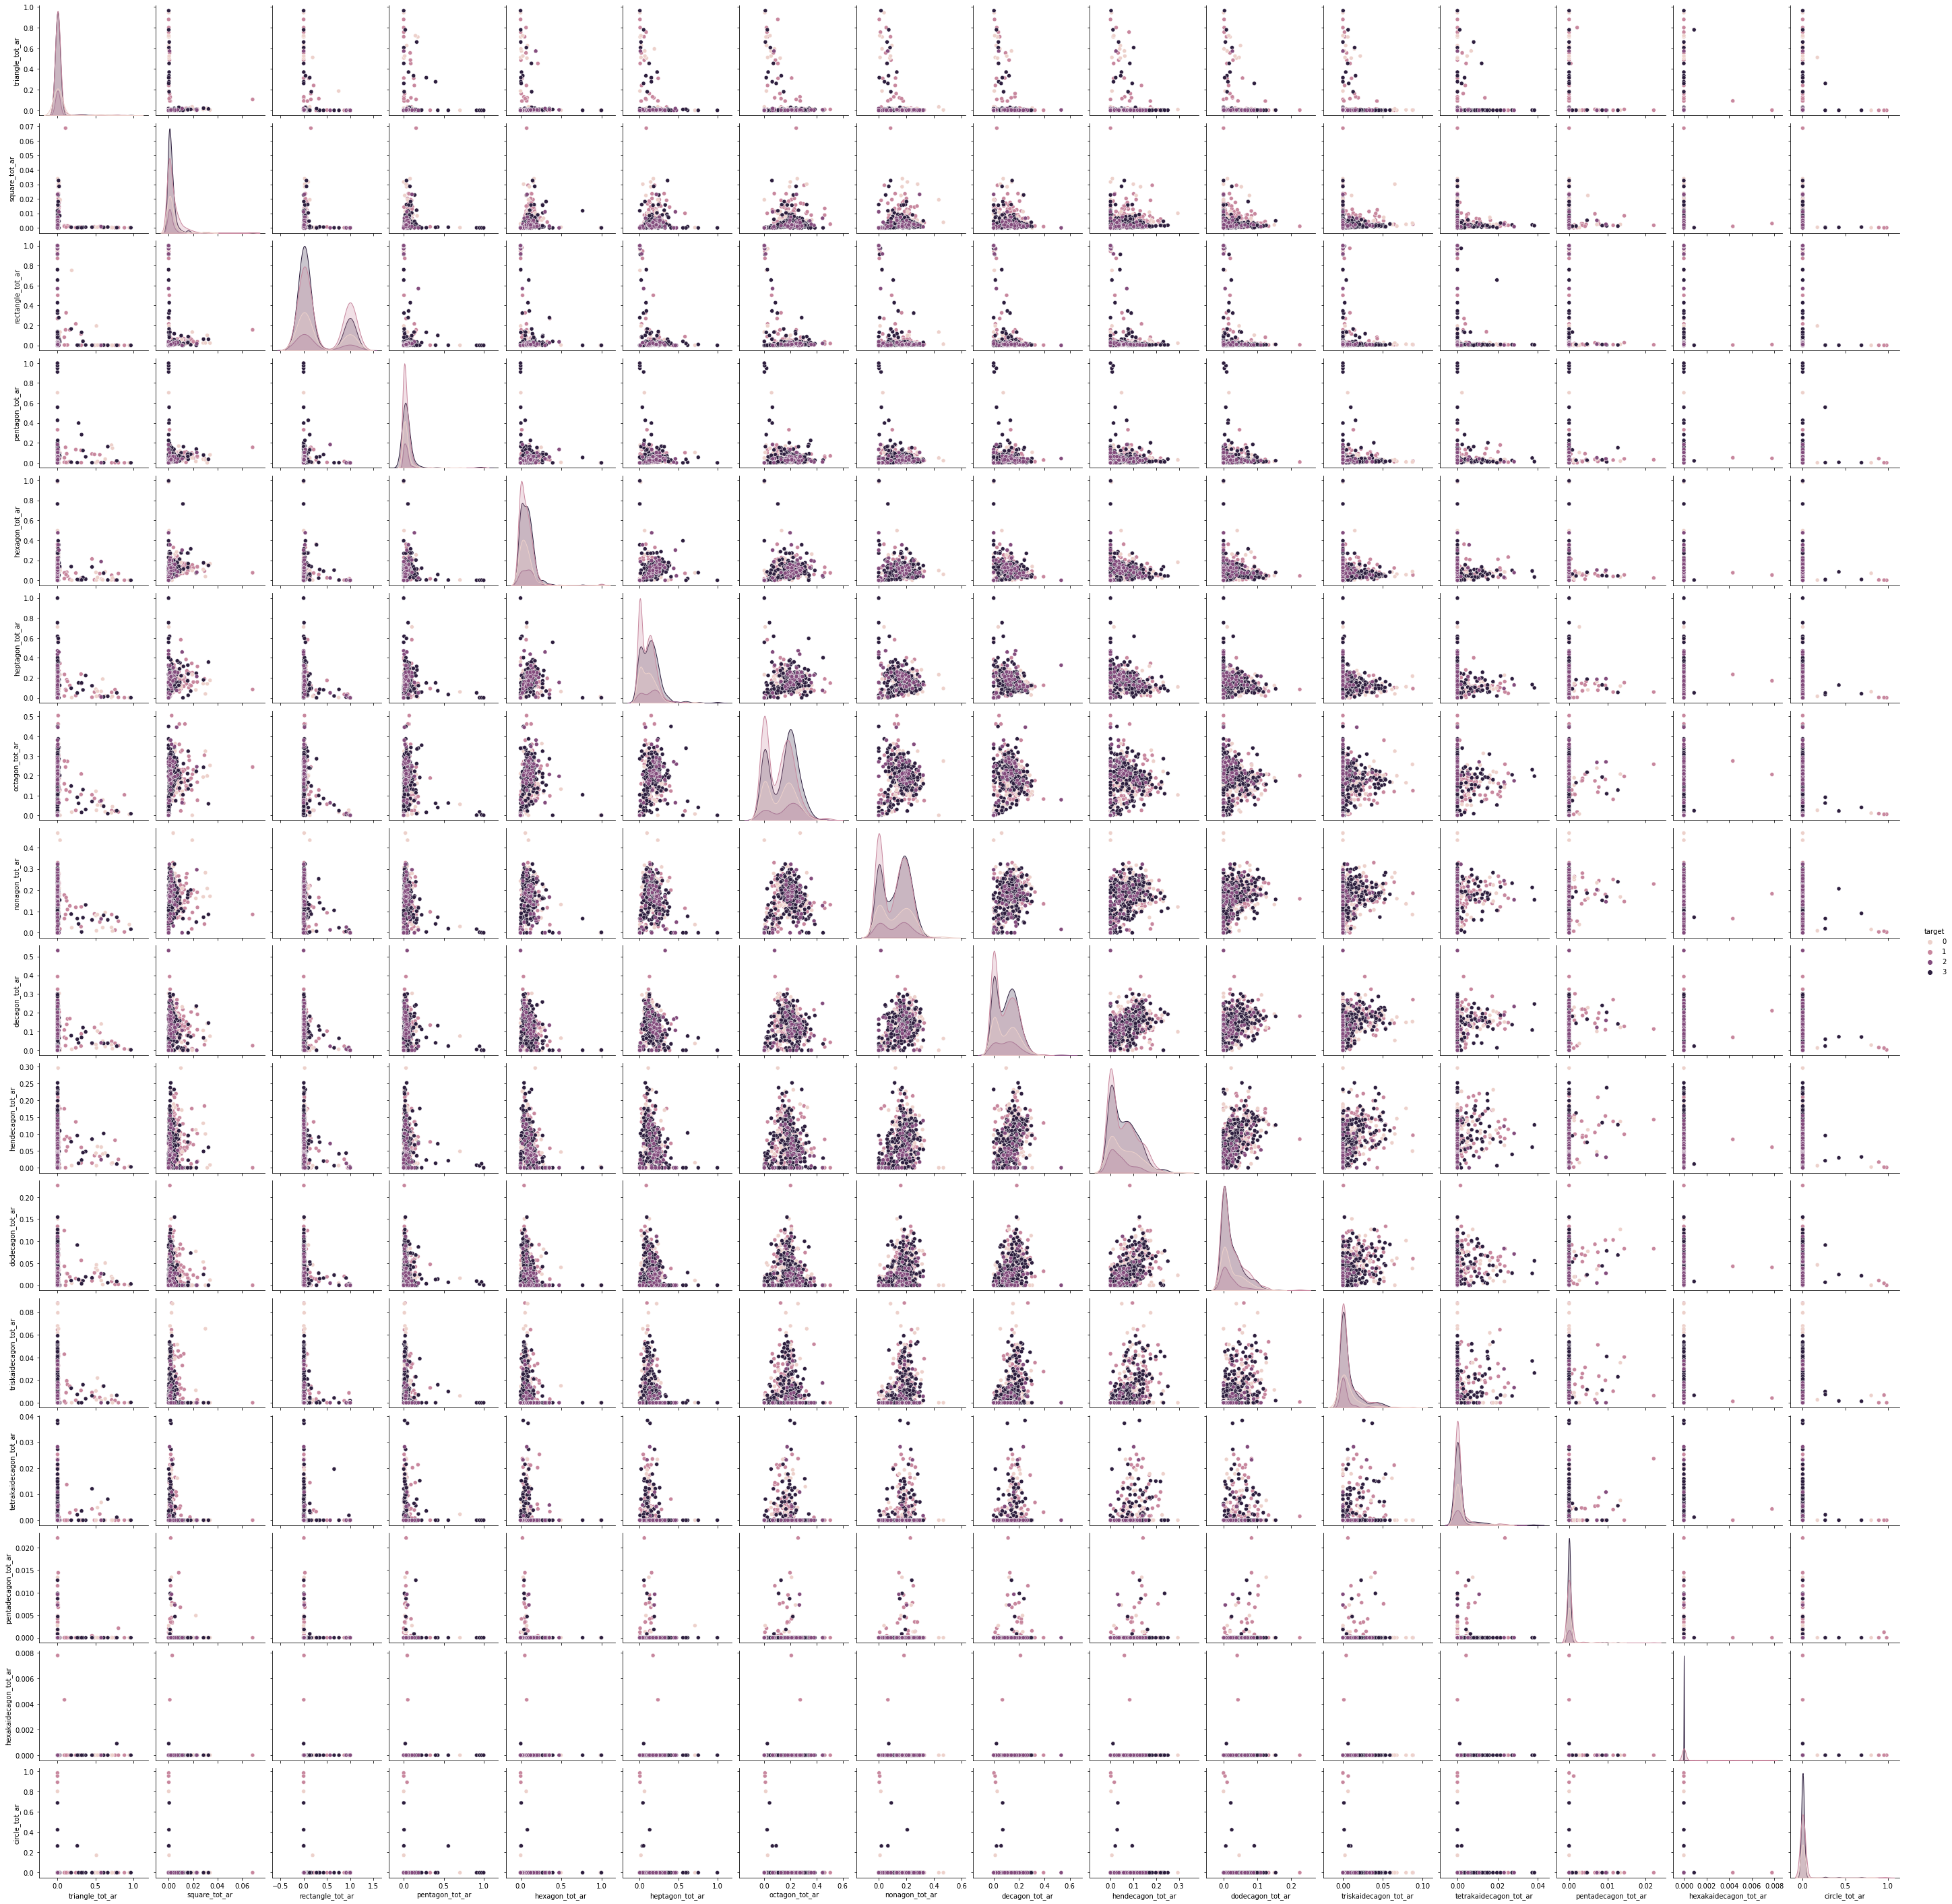

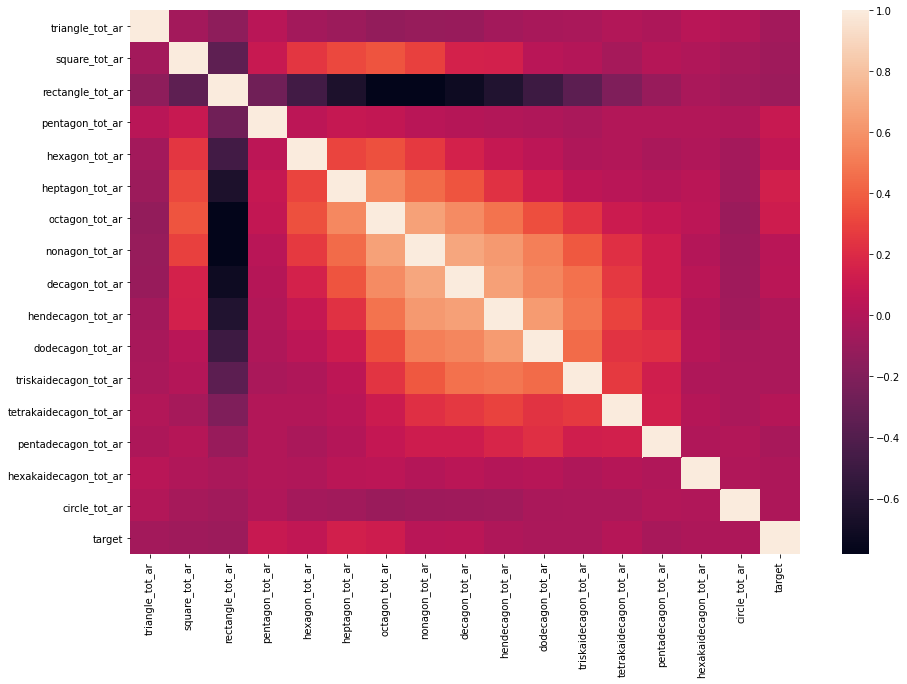

In [60]:
# let's evaluate visually how well our classes are differentiable on the pairplots
# can see two classes being present on a two variables charts?
# the pairplot function is an excellent way of seeing how variables inter-relate, but 30 feature can make studying each combination difficult!
sns.pairplot(full_dataset.loc[:, SHAPES_ta + ['target']], hue = 'target')

# we can again use seaborn to easily create a visually interesting chart 
plt.figure(figsize = (15, 10))

# we can add the annot=True parameter to the sns.heatmap arguments if we want to show the correlation values 
sns.heatmap(full_dataset.loc[:, SHAPES_ta + ['target']].corr(method='pearson'))

In [29]:
full_dataset.head()

mean_b     mean_g      mean_r      std_b      std_g      std_r  \
0  34.956015  70.928433   57.387928  17.041941  23.372782  28.066313   
1  29.327697  40.686489  160.215844  15.530814  20.430208  17.353201   
2  43.010365  63.124524   76.951336  29.751813  42.768351  50.113787   
3  51.602958  69.932688   86.567864  33.067227  44.218547  49.209738   
4  35.784941  57.063248   72.883878  13.016950  23.593195  33.389772   

          k1        s1  number_of_objects_in_image  triangle_cnt  ...  \
0  18.746509  3.846524                        1717      0.069231  ...   
1  40.400331  5.678473                         987      0.000000  ...   
2   4.659184  2.199372                        4536      0.085572  ...   
3   2.425899  1.630398                        7632      0.066895  ...   
4  10.582797  2.584768                        1085      0.055319  ...   

   nonagon_avg_ar  decagon_avg_ar  hendecagon_avg_ar  dodecagon_avg_ar  \
0     1096.365854      764.105769         879.540000       1739.909091   
1        0.000000        0.000000           0.000000          0.000000   
2     1487.154545     1187.794118        1200.471429       1152.058824   
3     1218.089286     1297.156250         577.821429        576.500000   
4     1381.279412     3488.935897        3525.653846       1567.357143   

   triskaidecagon_avg_ar  tetrakaidecagon_avg_ar  pentadecagon_avg_ar  \
0               1768.250                 136.000                  0.0   
1                  0.000                   0.000                  0.0   
2               1790.625                1569.375                  0.0   
3               2634.000                1261.750                259.5   
4               4760.000                1062.000                  0.0   

   hexakaidecagon_avg_ar  circle_avg_ar  target  
0                    0.0            0.0       1  
1                    0.0            0.0       1  
2                    0.0            0.0       1  
3                    0.0            0.0       1  
4                    0.0            0.0       1  

[5 rows x 58 columns]

In [7]:
from sklearn.model_selection import train_test_split

x = df[col_features]
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y)

train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)

train.to_csv('./sd_train.csv', header=True, index=False)
test.to_csv('./sd_test.csv', header=True, index=False)

NameError: name 'df' is not defined

In [8]:
tot_records = 0
for i in range(len(distinct_classes)):
    train_record_count = int(train[train['target'] == i].shape[0])
    test_record_count = int(test[test['target'] == i].shape[0])
    print("Class:\t\t{} ({})".format(list(class_map.keys())[list(class_map.values()).index(i)], i))
    print("Train Records:\t{}".format(train_record_count))
    print("Test Records:\t{}".format(test_record_count))
    print("Total Records:\t{}".format(train_record_count + test_record_count))
    tot_records += train_record_count + test_record_count
    print()
print("All records:\t{}".format(tot_records))

NameError: name 'distinct_classes' is not defined

In [32]:
import logging

from matplotlib import pyplot as plt|
import pandas as pd
import os

import azureml.core
from azureml.core.experiment import Experiment
from azureml.core.workspace import Workspace
from azureml.automl.core.featurization import FeaturizationConfig
from azureml.core.dataset import Dataset
from azureml.train.automl import AutoMLConfig
from azureml.interpret import ExplanationClient

In [33]:
print("This notebook was created using version 1.22.0 of the Azure ML SDK")
print("You are currently using version", azureml.core.VERSION, "of the Azure ML SDK")

This notebook was created using version 1.22.0 of the Azure ML SDK
You are currently using version 1.22.0 of the Azure ML SDK


In [35]:
# from azureml.core.authentication import InteractiveLoginAuthentication
# auth = InteractiveLoginAuthentication(tenant_id = '9dfd1e5e-bb06-40df-8eeb-2a295fe4dda5')
ws = Workspace.from_config(auth = auth)

In [9]:
# ws = Workspace.from_config()

# choose a name for experiment
experiment_name = 'xxxxxxxx'

experiment=Experiment(ws, experiment_name)

output = {}
output['Subscription ID'] = ws.subscription_id
output['Workspace'] = ws.name
output['Resource Group'] = ws.resource_group
output['Location'] = ws.location
output['Experiment Name'] = experiment.name
pd.set_option('display.max_colwidth', -1)
outputDf = pd.DataFrame(data = output, index = [''])
outputDf.T

NameError: name 'Experiment' is not defined

In [10]:
from azureml.core.compute import ComputeTarget, AmlCompute
from azureml.core.compute_target import ComputeTargetException

# Choose a name for your CPU cluster
cpu_cluster_name = "cpu-cluster-4"

# Verify that cluster does not exist already
try:
    compute_target = ComputeTarget(workspace=ws, name=cpu_cluster_name)
    print('Found existing cluster, use it.')
except ComputeTargetException:
    compute_config = AmlCompute.provisioning_configuration(vm_size='STANDARD_D2_V2',
                                                           max_nodes=6)
    compute_target = ComputeTarget.create(ws, cpu_cluster_name, compute_config)

compute_target.wait_for_completion(show_output=True)

NameError: name 'ws' is not defined

In [38]:
# Upload the training data as a tabular dataset for access during training on remote compute
#train_data =  Dataset.Tabular.from_delimited_files(train_data)
dataset_name = 'sd_train_v5'
label = "target"

# Get a dataset by name
train_data_ds = Dataset.get_by_name(workspace=ws, name=dataset_name)

In [39]:
dataset_name = 'sd_test_v5'

# Get a dataset by name
validation_data_ds = Dataset.get_by_name(workspace=ws, name=dataset_name)

In [ ]:
dataset_name = 'test_data'

# Get a dataset by name
test_data_ds = Dataset.get_by_name(workspace=ws, name=dataset_name)

In [40]:
automl_settings = {
    "experiment_timeout_hours" : 0.5,
    "enable_early_stopping" : True,
    "iteration_timeout_minutes": 5,
    "max_concurrent_iterations": 4,
    "max_cores_per_iteration": -1,
    #"n_cross_validations": 2,
    "primary_metric": 'accuracy',
    "featurization": 'off',
    "verbosity": logging.INFO,
}

automl_config = AutoMLConfig(task = 'classification',
                             debug_log = 'automl_errors.log',
                             compute_target=compute_target,
                             experiment_exit_score = 0.9984,
                             #blocked_models = ['KNN','LinearSVM'],
                             enable_onnx_compatible_models=True,
                             training_data = train_data_ds,
                             label_column_name = label,
                             validation_data = validation_data_ds,
                             **automl_settings
                            )

In [41]:
remote_run = experiment.submit(automl_config, show_output = False)

Running on remote.


In [ ]:
remote_run

In [ ]:
# Wait for the remote run to complete
remote_run.wait_for_completion()